Tuning $\gamma_D$

In [ ]:
import sys
sys.path.append("utils")
import dynamic_backtesting as db
import compare_strategies as cs
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 
plt.rcParams.update({
   "text.usetex": True,
   "font.family": ['Latin Modern Roman'],
   "xtick.labelsize": 20.0,
   "ytick.labelsize": 20.0,
   "axes.labelsize":  20.0,
   "legend.fontsize": 18.0
})  

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
stocks_dic = {asset: assets[asset] for asset in stocks }
commodities = tickers[7:9]
commodities_dic = {asset: assets[asset] for asset in commodities }
bonds = tickers[9:]
bonds_dic = {asset: assets[asset] for asset in bonds }

**All assets**

In [ ]:
sharpes_all_ARCH, std_all_ARCH = db.test_gamma_D_params(tickers, number_of_out_of_sample_days=1000, model_type="sGARCH10", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)
sharpes_all_GARCH, std_all_GARCH = db.test_gamma_D_params(tickers, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)
sharpes_all_GJR, std_all_GJR = db.test_gamma_D_params(tickers, number_of_out_of_sample_days=1000, model_type="gjrGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)

In [ ]:
sharpes_all_ARCH_pd = pd.DataFrame(sharpes_all_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_all_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_all_ARCH_pd = pd.DataFrame(std_all_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
std_all_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_all_GARCH_pd = pd.DataFrame(sharpes_all_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_all_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_all_GARCH_pd = pd.DataFrame(std_all_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_all_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_all_GJR_pd = pd.DataFrame(sharpes_all_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_all_GJR_pd.set_index('gamma_D', drop=True, inplace=True)
std_all_GJR_pd = pd.DataFrame(std_all_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_all_GJR_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
sharpes_all_pd=sharpes_all_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
sharpes_all_pd["GARCH TC"]=sharpes_all_GARCH_pd["GARCH TC"]
sharpes_all_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=sharpes_all_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

std_all_pd=std_all_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
std_all_pd["GARCH TC"]=std_all_GARCH_pd["GARCH TC"]
std_all_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=std_all_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

In [ ]:
# min std gamma
min_gamma_all=std_all_pd.loc[std_all_pd["GARCH TC"] == min(std_all_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_all=sharpes_all_pd.loc[sharpes_all_pd["GARCH TC"] == max(sharpes_all_pd["GARCH TC"]) ]
print(str(min_gamma_all)+"\n"+str(max_gamma_all))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax.plot(std_all_pd)
ax.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='upper right')
ax.set_xlabel(r"\textbf{$\gamma_D$}")
ax.set_ylabel(r"\textbf{Standard Deviation}",loc='top', rotation = 0, labelpad = -235)
ax.set_xscale('log')
ax.set_yscale('log')
ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(base=2,numticks=200))
ax.set_xlim(1e-6,1)
fig.savefig("Tuning_Gamma_std_all.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax1.plot(sharpes_all_pd)
ax1.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='center right')
ax1.set_xlabel(r"\textbf{$\gamma_D$}")
ax1.set_ylabel(r"\textbf{Sharpe Ratio}",loc='top', rotation = 0, labelpad = -175)
ax1.set_xscale('log') 
ax1.set_xlim(1e-6,1)
fig1.savefig("Tuning_Gamma_sharpes_all.png", bbox_inches = 'tight', pad_inches = 0.1)

 **Stocks**

In [ ]:
sharpes_stock_ARCH, std_stock_ARCH = db.test_gamma_D_params(stocks, number_of_out_of_sample_days=1000, model_type="sGARCH10", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)
sharpes_stock_GARCH, std_stock_GARCH = db.test_gamma_D_params(stocks, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)
sharpes_stock_GJR, std_stock_GJR = db.test_gamma_D_params(stocks, number_of_out_of_sample_days=1000, model_type="gjrGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)

In [ ]:
sharpes_stock_ARCH_pd = pd.DataFrame(sharpes_stock_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_stock_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_stock_ARCH_pd = pd.DataFrame(std_stock_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
std_stock_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_stock_GARCH_pd = pd.DataFrame(sharpes_stock_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_stock_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_stock_GARCH_pd = pd.DataFrame(std_stock_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_stock_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_stock_GJR_pd = pd.DataFrame(sharpes_stock_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_stock_GJR_pd.set_index('gamma_D', drop=True, inplace=True)
std_stock_GJR_pd = pd.DataFrame(std_stock_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_stock_GJR_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
sharpes_stock_pd=sharpes_stock_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
sharpes_stock_pd["GARCH TC"]=sharpes_stock_GARCH_pd["GARCH TC"]
sharpes_stock_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=sharpes_stock_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

std_stock_pd=std_stock_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
std_stock_pd["GARCH TC"]=std_stock_GARCH_pd["GARCH TC"]
std_stock_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=std_stock_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

In [ ]:
# min std gamma
min_gamma_stocks=std_stock_pd.loc[std_stock_pd["GARCH TC"] == min(std_stock_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_stocks=sharpes_stock_pd.loc[sharpes_stock_pd["GARCH TC"] == max(sharpes_stock_pd["GARCH TC"]) ]
print(str(min_gamma_stocks)+"\n"+str(max_gamma_stocks))

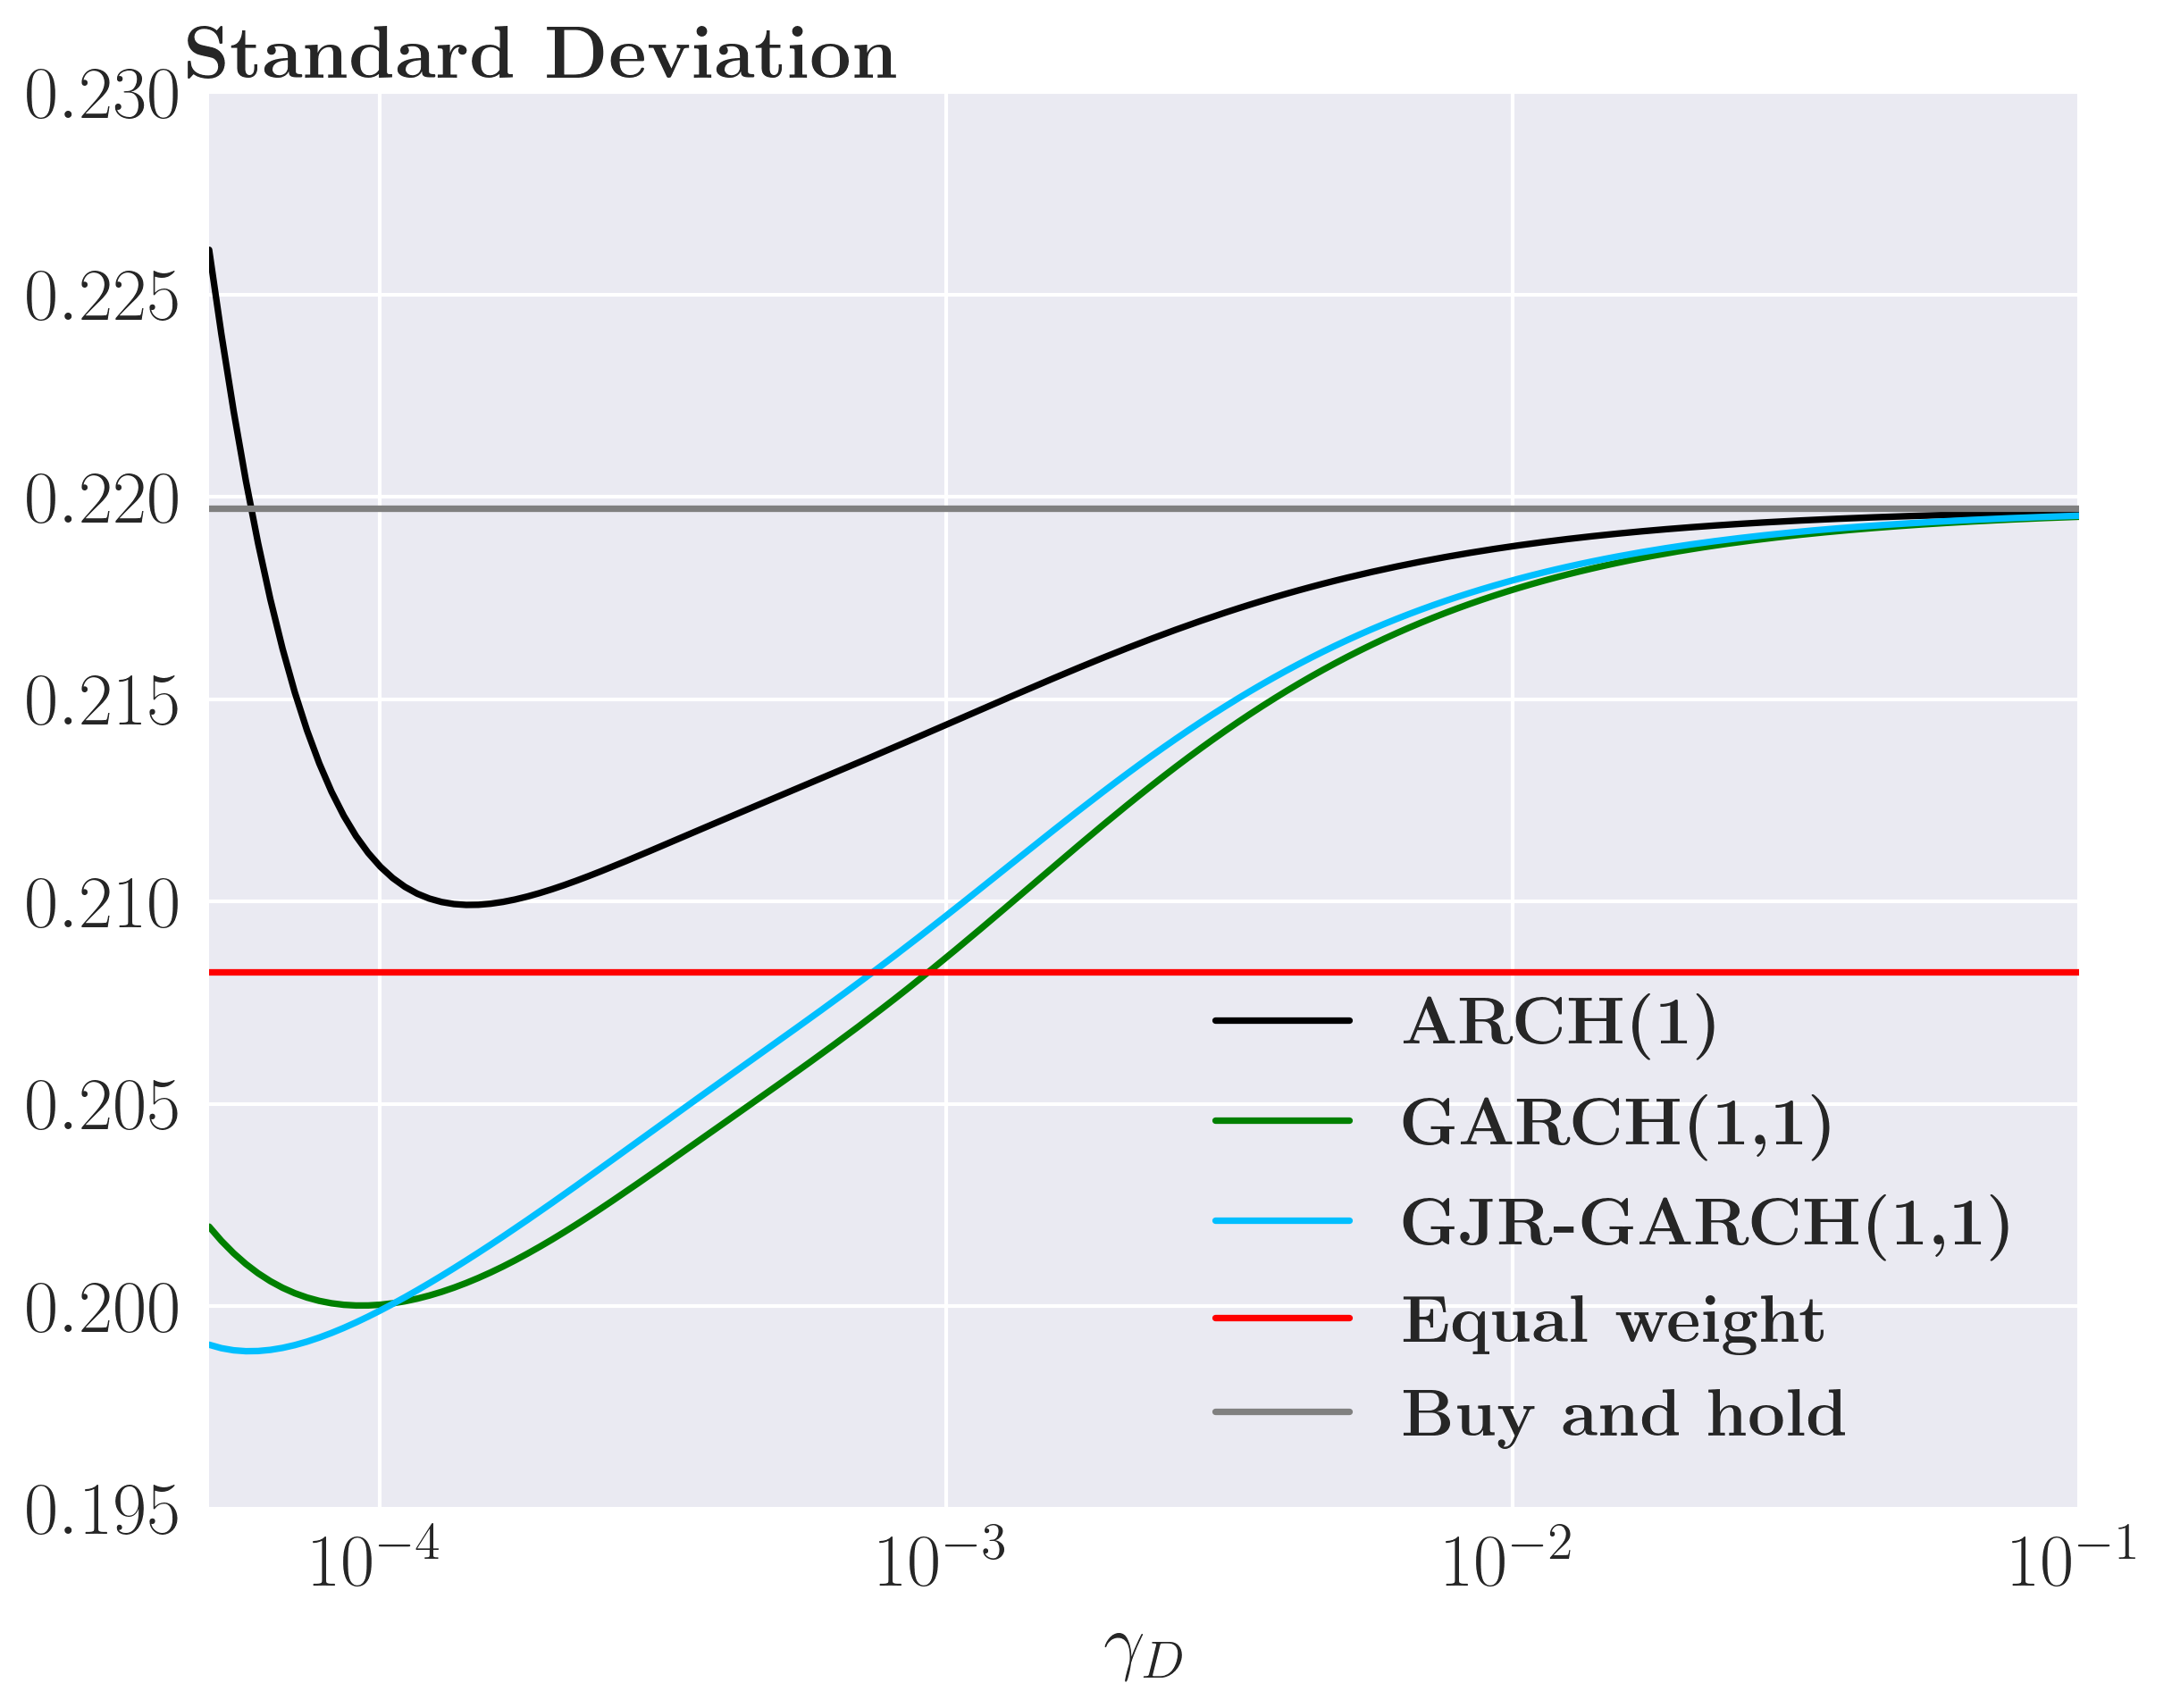

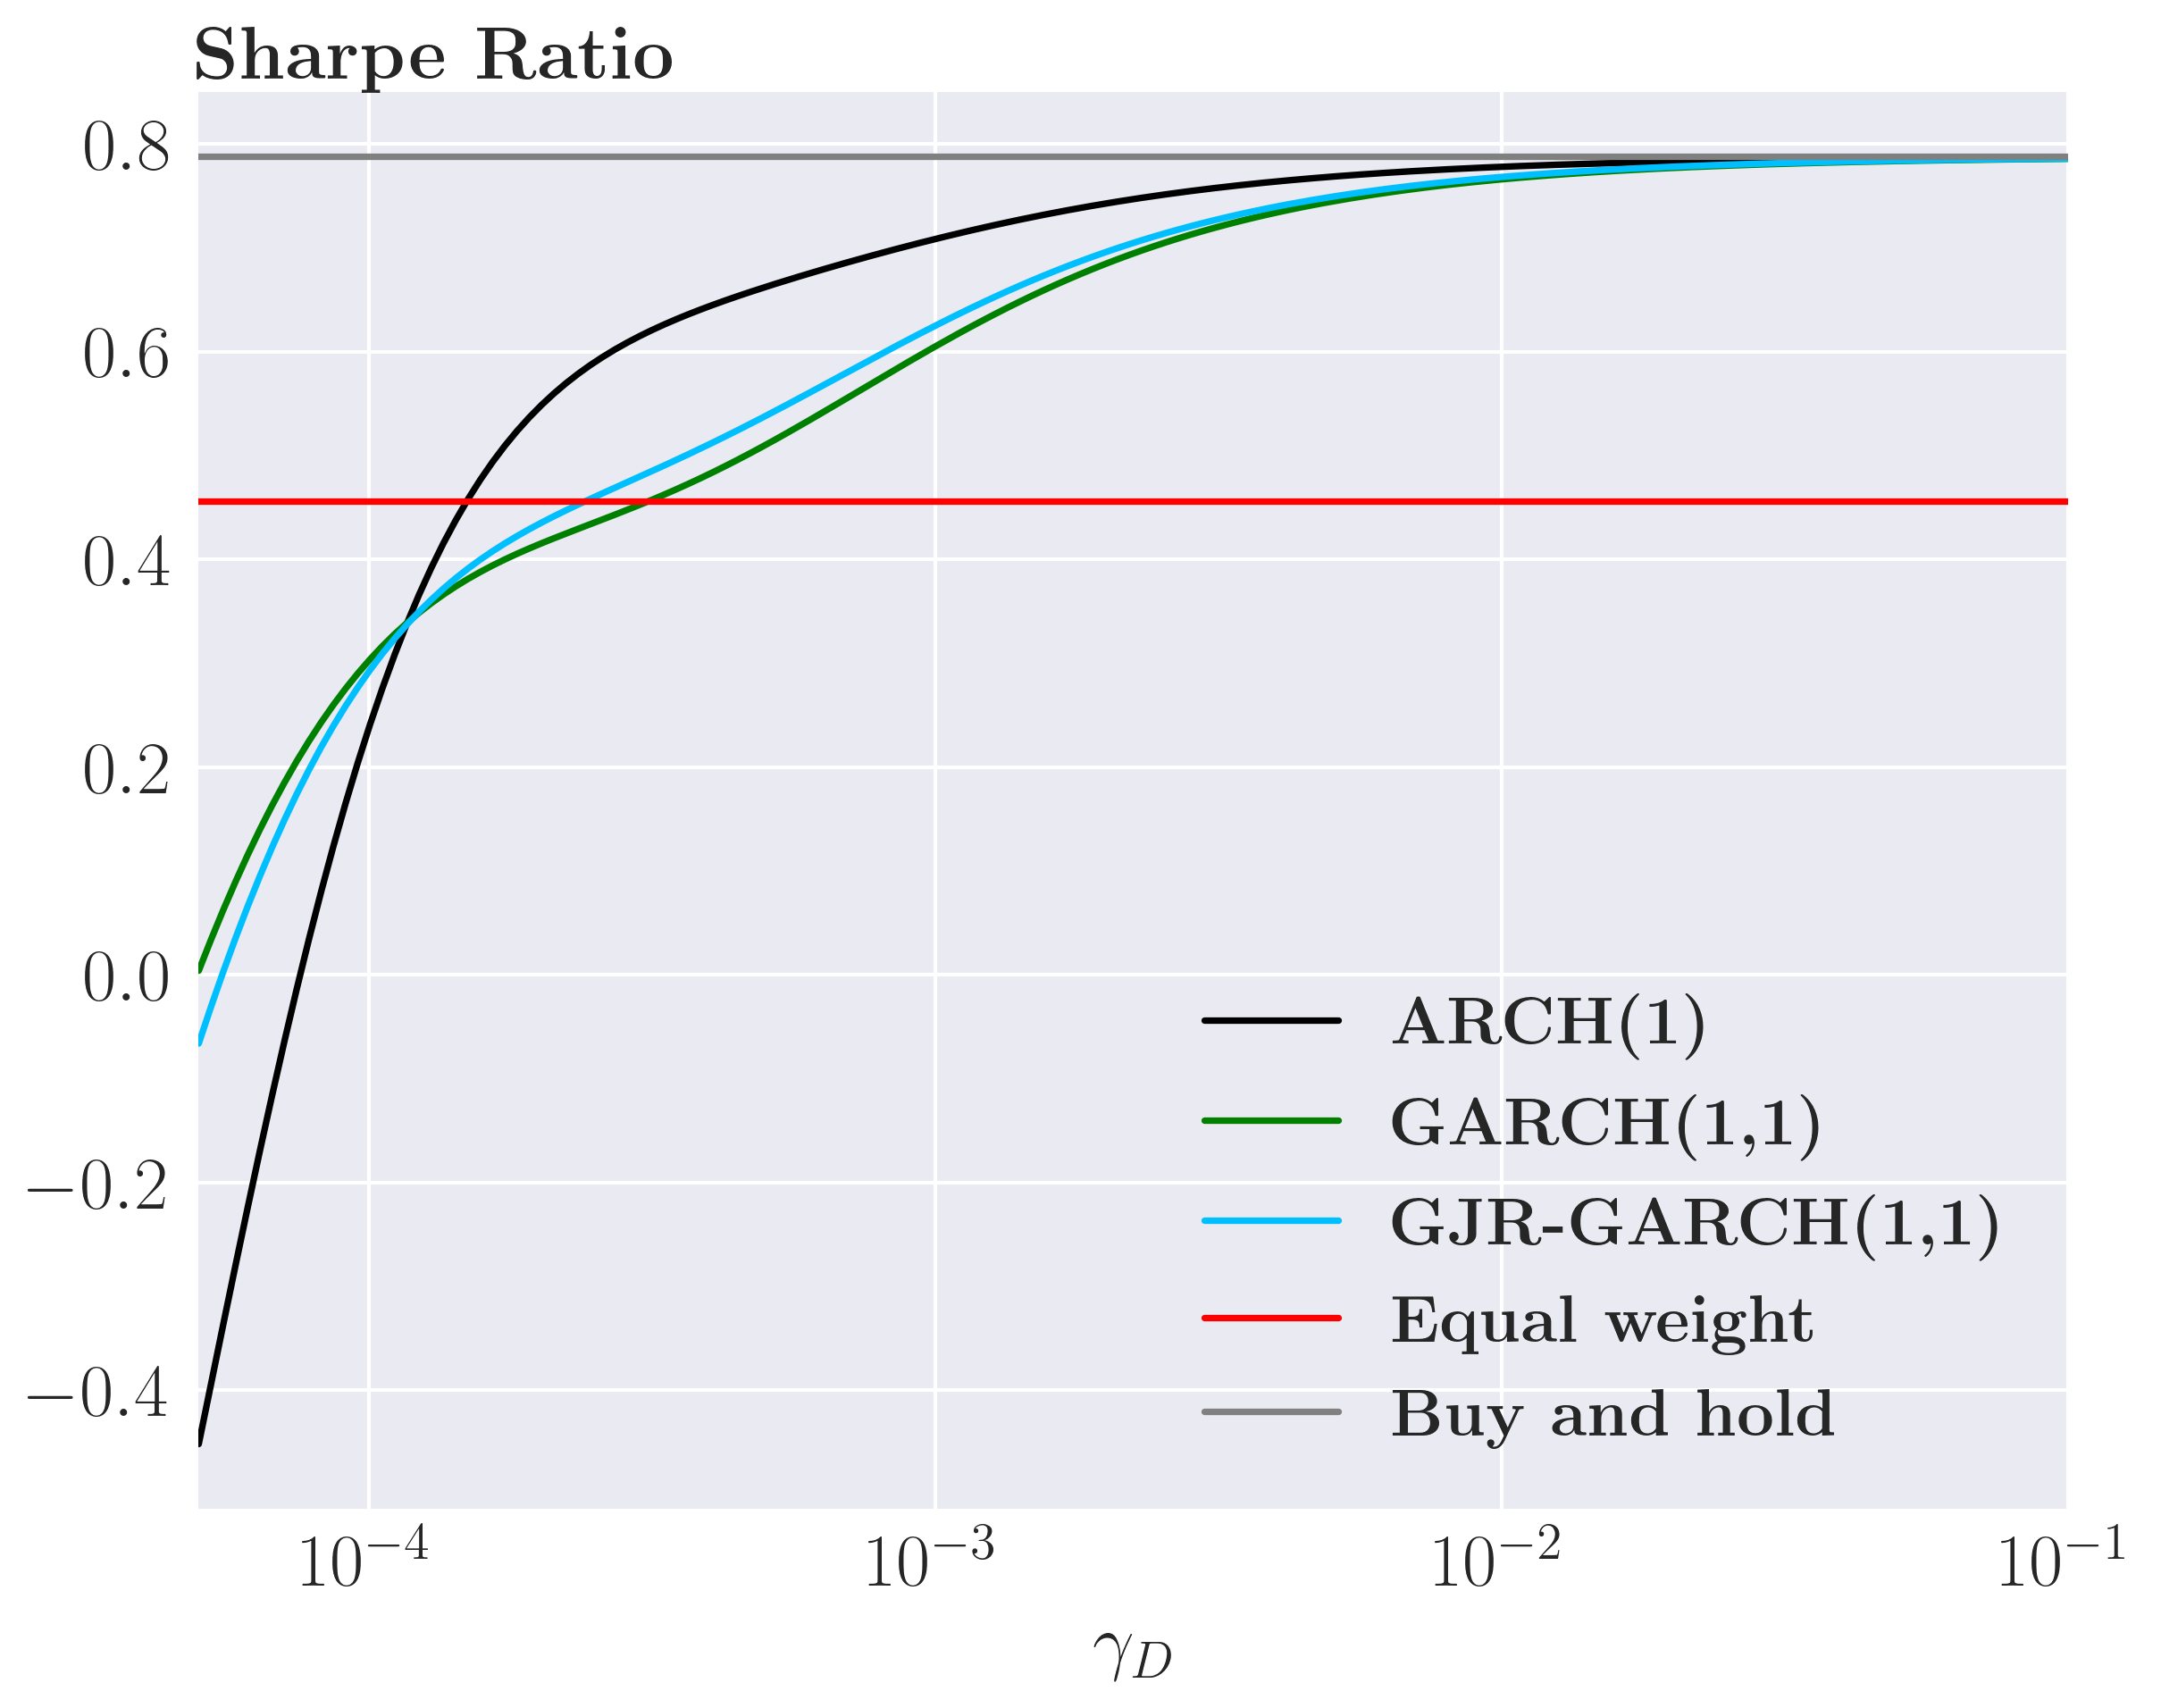

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax.plot(std_stock_pd)
ax.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='lower right')
ax.set_xlabel(r"\textbf{$\gamma_D$}")
ax.set_ylabel(r"\textbf{Standard Deviation}",loc='top', rotation = 0, labelpad = -235)
ax.set_xscale('log')
ax.set_xlim(5e-5,1e-1)
ax.set_ylim(0.195,0.230)
fig.savefig("Tuning_Gamma_std_stocks.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax1.plot(sharpes_stock_pd)
ax1.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='lower right')
ax1.set_xlabel(r"\textbf{$\gamma_D$}")
ax1.set_ylabel(r"\textbf{Sharpe Ratio}",loc='top', rotation = 0, labelpad = -175)
ax1.set_xscale('log')  
ax1.set_xlim(5e-5,1e-1)
fig1.savefig("Tuning_Gamma_sharpes_stocks.png", bbox_inches = 'tight', pad_inches = 0.1)

**commodities**

In [ ]:
sharpes_com_ARCH, std_com_ARCH = db.test_gamma_D_params(commodities, number_of_out_of_sample_days=1000, model_type="sGARCH10", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)
sharpes_com_GARCH, std_com_GARCH = db.test_gamma_D_params(commodities, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)
sharpes_com_GJR, std_com_GJR = db.test_gamma_D_params(commodities, number_of_out_of_sample_days=1000, model_type="gjrGARCH11", portfolio_value=1e9,
                                  gamma_start=1e-6, gamma_end=1, gamma_num=200)

In [ ]:
sharpes_com_ARCH_pd = pd.DataFrame(sharpes_com_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_com_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_com_ARCH_pd = pd.DataFrame(std_com_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
std_com_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_com_GARCH_pd = pd.DataFrame(sharpes_com_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_com_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_com_GARCH_pd = pd.DataFrame(std_com_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_com_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_com_GJR_pd = pd.DataFrame(sharpes_com_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_com_GJR_pd.set_index('gamma_D', drop=True, inplace=True)
std_com_GJR_pd = pd.DataFrame(std_com_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_com_GJR_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
sharpes_com_pd=sharpes_com_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
sharpes_com_pd["GARCH TC"]=sharpes_com_GARCH_pd["GARCH TC"]
sharpes_com_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=sharpes_com_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

std_com_pd=std_com_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
std_com_pd["GARCH TC"]=std_com_GARCH_pd["GARCH TC"]
std_com_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=std_com_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

In [ ]:
# min std gamma
min_gamma_com=std_com_GARCH_pd.loc[std_com_GARCH_pd["GARCH TC"] == min(std_com_GARCH_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_com=sharpes_com_GARCH_pd.loc[sharpes_com_GARCH_pd["GARCH TC"] == max(sharpes_com_GARCH_pd["GARCH TC"]) ]
print(str(min_gamma_com)+"\n"+str(max_gamma_com))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax.plot(std_com_pd)
ax.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='upper right')
ax.set_xlabel(r"\textbf{$\gamma_D$}")
ax.set_ylabel(r"\textbf{Standard Deviation}",loc='top', rotation = 0, labelpad = -235)
ax.set_xscale('log')
ax.set_xlim(1e-6,1e-1)
fig.savefig("Tuning_Gamma_std_com.png", bbox_inches = 'tight', pad_inches = 0.1)


fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax1.plot(sharpes_com_pd)
ax1.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='lower right')
ax1.set_xlabel(r"\textbf{$\gamma_D$}")
ax1.set_ylabel(r"\textbf{Sharpe Ratio}",loc='top', rotation = 0, labelpad = -175)
ax1.set_xscale('log') 
ax1.set_xlim(1e-6,1e-1)
fig1.savefig("Tuning_Gamma_sharpes_com.png", bbox_inches = 'tight', pad_inches = 0.1)

**Bonds**

In [ ]:
sharpes_bonds_ARCH, std_bonds_ARCH = db.test_gamma_D_params(bonds, number_of_out_of_sample_days=1000, model_type="sGARCH10", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)
sharpes_bonds_GARCH, std_bonds_GARCH = db.test_gamma_D_params(bonds, number_of_out_of_sample_days=1000, model_type="sGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)
sharpes_bonds_GJR, std_bonds_GJR = db.test_gamma_D_params(bonds, number_of_out_of_sample_days=1000, model_type="gjrGARCH11", portfolio_value=1e9,
                                  gamma_start=5e-5, gamma_end=1, gamma_num=200)

In [ ]:
sharpes_bonds_ARCH_pd = pd.DataFrame(sharpes_bonds_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_bonds_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_bonds_ARCH_pd = pd.DataFrame(std_bonds_ARCH, columns=['gamma_D', 'ARCH TC', 'Equal_weight TC', 'BnH TC'])
std_bonds_ARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_bonds_GARCH_pd = pd.DataFrame(sharpes_bonds_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_bonds_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)
std_bonds_GARCH_pd = pd.DataFrame(std_bonds_GARCH, columns=['gamma_D', 'GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_bonds_GARCH_pd.set_index('gamma_D', drop=True, inplace=True)

sharpes_bonds_GJR_pd = pd.DataFrame(sharpes_bonds_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
sharpes_bonds_GJR_pd.set_index('gamma_D', drop=True, inplace=True)
std_bonds_GJR_pd = pd.DataFrame(std_bonds_GJR, columns=['gamma_D', 'GJR-GARCH TC', 'Equal_weight TC', 'BnH TC'])
std_bonds_GJR_pd.set_index('gamma_D', drop=True, inplace=True)

In [ ]:
sharpes_bonds_pd=sharpes_bonds_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
sharpes_bonds_pd["GARCH TC"]=sharpes_bonds_GARCH_pd["GARCH TC"]
sharpes_bonds_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=sharpes_bonds_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

std_bonds_pd=std_bonds_ARCH_pd.drop(columns=['Equal_weight TC', 'BnH TC'])
std_bonds_pd["GARCH TC"]=std_bonds_GARCH_pd["GARCH TC"]
std_bonds_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]=std_bonds_GJR_pd[['GJR-GARCH TC', 'Equal_weight TC', 'BnH TC']]

In [ ]:
# min std gamma
min_gamma_bonds=std_bonds_pd.loc[std_bonds_pd["GARCH TC"] == min(std_bonds_pd["GARCH TC"]) ]
# max SR gamma
max_gamma_bonds=sharpes_bonds_pd.loc[sharpes_bonds_pd["GARCH TC"] == max(sharpes_bonds_pd["GARCH TC"]) ]
print(str(min_gamma_bonds)+"\n"+str(max_gamma_bonds))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax.plot(std_bonds_pd)
ax.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='lower right')
ax.set_xlabel(r"\textbf{$\gamma_D$}")
ax.set_ylabel(r"\textbf{Standard Deviation}",loc='top', rotation = 0, labelpad = -235)
ax.set_xscale('log')
ax.set_xlim(5e-5,1e-1)
fig.savefig("Tuning_Gamma_std_bond.png", bbox_inches = 'tight', pad_inches = 0.1)

fig1, ax1 = plt.subplots(1, 1, figsize=(9,7), dpi=300)
ax1.set_prop_cycle(matplotlib.cycler(color=["black", "green",  "deepskyblue","Red","Gray"]))
ax1.plot(sharpes_bonds_pd)
ax1.legend([r"\textbf{ARCH(1)}",r"\textbf{GARCH(1,1)}",r"\textbf{GJR-GARCH(1,1)}", r"\textbf{Equal weight}", r"\textbf{Buy and hold}"], loc='center right')
ax1.set_xlabel(r"\textbf{$\gamma_D$}")
ax1.set_ylabel(r"\textbf{Sharpe Ratio}",loc='top', rotation = 0, labelpad = -175)
ax1.set_xscale('log') 
ax1.set_xlim(5e-5,1e-1)
fig1.savefig("Tuning_Gamma_sharpes_bond.png", bbox_inches = 'tight', pad_inches = 0.1)